# Goal
A simple project to illustrate logistic regression on predicting customers who will likely be considered for a loan

### Import Libraries

In [4]:
import pandas as pd
import numpy as np
import matplotlib.pylab as plt
import seaborn as sns
plt.style.use('ggplot')

## Importing the Dataset

In [5]:
df = pd.read_csv("loan.csv")
df.head()

,age,gender,occupation,education_level,marital_status,income,credit_score,loan_status
0,32,Male,Engineer,Bachelor's,Married,85000,720,Approved
1,45,Female,Teacher,Master's,Single,62000,680,Approved
2,28,Male,Student,High School,Single,25000,590,Denied
3,51,Female,Manager,Bachelor's,Married,105000,780,Approved
4,36,Male,Accountant,Bachelor's,Married,75000,710,Approved


## EDA

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 61 entries, 0 to 60
Data columns (total 8 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   age              61 non-null     int64 
 1   gender           61 non-null     object
 2   occupation       61 non-null     object
 3   education_level  61 non-null     object
 4   marital_status   61 non-null     object
 5   income           61 non-null     int64 
 6   credit_score     61 non-null     int64 
 7   loan_status      61 non-null     object
dtypes: int64(3), object(5)
memory usage: 3.9+ KB


In [7]:
df.describe()

,age,income,credit_score
count,61.000000,61.000000,61.000000
mean,37.081967,78983.606557,709.836066
std,8.424755,33772.025802,72.674888
min,24.000000,25000.000000,560.000000
25%,30.000000,52000.000000,650.000000
50%,36.000000,78000.000000,720.000000
75%,43.000000,98000.000000,770.000000
max,55.000000,180000.000000,830.000000


### Checking for missing rows

In [8]:
df.isnull().sum()

age                0
gender             0
occupation         0
education_level    0
marital_status     0
income             0
credit_score       0
loan_status        0
dtype: int64

### Encoding categorical data

In [9]:
df_encoded = pd.get_dummies(df, drop_first = True)
df_encoded

,age,income,credit_score,gender_Male,occupation_Analyst,occupation_Architect,occupation_Artist,occupation_Banker,occupation_Chef,occupation_Consultant,...,occupation_Stylist,occupation_Teacher,occupation_Veterinarian,occupation_Writer,education_level_Bachelor's,education_level_Doctoral,education_level_High School,education_level_Master's,marital_status_Single,loan_status_Denied
0,32,85000,720,True,False,False,False,False,False,False,...,False,False,False,False,True,False,False,False,False,False
1,45,62000,680,False,False,False,False,False,False,False,...,False,True,False,False,False,False,False,True,True,False
2,28,25000,590,True,False,False,False,False,False,False,...,False,False,False,False,False,False,True,False,True,True
3,51,105000,780,False,False,False,False,False,False,False,...,False,False,False,False,True,False,False,False,False,False
4,36,75000,710,True,False,False,False,False,False,False,...,False,False,False,False,True,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
56,39,100000,770,True,False,True,False,False,False,False,...,False,False,False,False,False,False,False,True,False,False
57,25,32000,570,False,False,False,False,False,False,False,...,False,False,False,False,False,False,True,False,True,True
58,43,95000,760,True,False,False,False,True,False,False,...,False,False,False,False,True,False,False,False,False,False
59,30,55000,650,False,False,False,False,False,False,False,...,False,False,False,True,False,False,False,True,True,False


In [10]:
df_encoded.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 61 entries, 0 to 60
Data columns (total 47 columns):
 #   Column                       Non-Null Count  Dtype
---  ------                       --------------  -----
 0   age                          61 non-null     int64
 1   income                       61 non-null     int64
 2   credit_score                 61 non-null     int64
 3   gender_Male                  61 non-null     bool 
 4   occupation_Analyst           61 non-null     bool 
 5   occupation_Architect         61 non-null     bool 
 6   occupation_Artist            61 non-null     bool 
 7   occupation_Banker            61 non-null     bool 
 8   occupation_Chef              61 non-null     bool 
 9   occupation_Consultant        61 non-null     bool 
 10  occupation_Dentist           61 non-null     bool 
 11  occupation_Designer          61 non-null     bool 
 12  occupation_Doctor            61 non-null     bool 
 13  occupation_Editor            61 non-null     bool 
 

In [11]:
X = df_encoded.drop("loan_status_Denied", axis = 1)
y = df_encoded["loan_status_Denied"]

## spliting to test and train set

In [12]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state=42)

## Training the Data

In [13]:
from sklearn.linear_model import LogisticRegression

lr = LogisticRegression()

In [14]:
lr.fit(X_train, y_train)

LogisticRegression()

In [15]:
y_pred = lr.predict(X_test)

In [16]:
## Evaluating our model
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

accuracy = accuracy_score(y_test, y_pred)
print(f"Our accuracy is {accuracy * 100} %")

Our accuracy is 100.0 %


In [17]:
confusion = confusion_matrix(y_test, y_pred)
print(confusion)

[[9 0]
 [0 4]]


In [27]:
report = classification_report(y_test, y_pred)
print(report)

              precision    recall  f1-score   support

       False       1.00      1.00      1.00         9
        True       1.00      1.00      1.00         4

    accuracy                           1.00        13
   macro avg       1.00      1.00      1.00        13
weighted avg       1.00      1.00      1.00        13



it's usually not the case to achieve a 100 percent accuracy. this is due to the fact that our data set is very small

### Simulating our model

In [19]:
new_df = pd.DataFrame(np.zeros((1, X_train.shape[1])), columns = X_train.columns)

## np.zeros(row, column), then name of column

new_df.at[0, 'age'] = 35
new_df.at[0, 'income'] = 80000
new_df.at[0, 'credit_score'] = 650
new_df.at[0, 'gender_Male'] = 1
new_df.at[0, 'occupation_Engineer'] = 1
new_df.at[0, 'education_level_Bachelor\'s'] = 1
new_df.at[0, 'marital_status_Single'] = 1

prediction =lr.predict(new_df)

if prediction[0] == True:
    result = "Denied"
else:
    result = "Approved"

print(result)

Approved


### Cross validating our model and data

Since our model appeared to be perfect, cross validation will help iron things out, and help us us find potential hidden loop-holes or gaps

In [22]:
from sklearn.model_selection import cross_val_score
cv_score = cross_val_score(lr, X, y, cv = 5)
print(f"Cross validation scores:{cv_score}")
print(f"Mean of Cross validation scorses:{cv_score.mean()}")

Cross validation scores:[1.         0.91666667 0.91666667 1.         1.        ]
Mean of Cross validation scorses:0.9666666666666666


### Checking the balance of our target

In [24]:
df_encoded['loan_status_Denied'].value_counts()

loan_status_Denied
False    45
True     16
Name: count, dtype: int64

## checking to see the features that are important

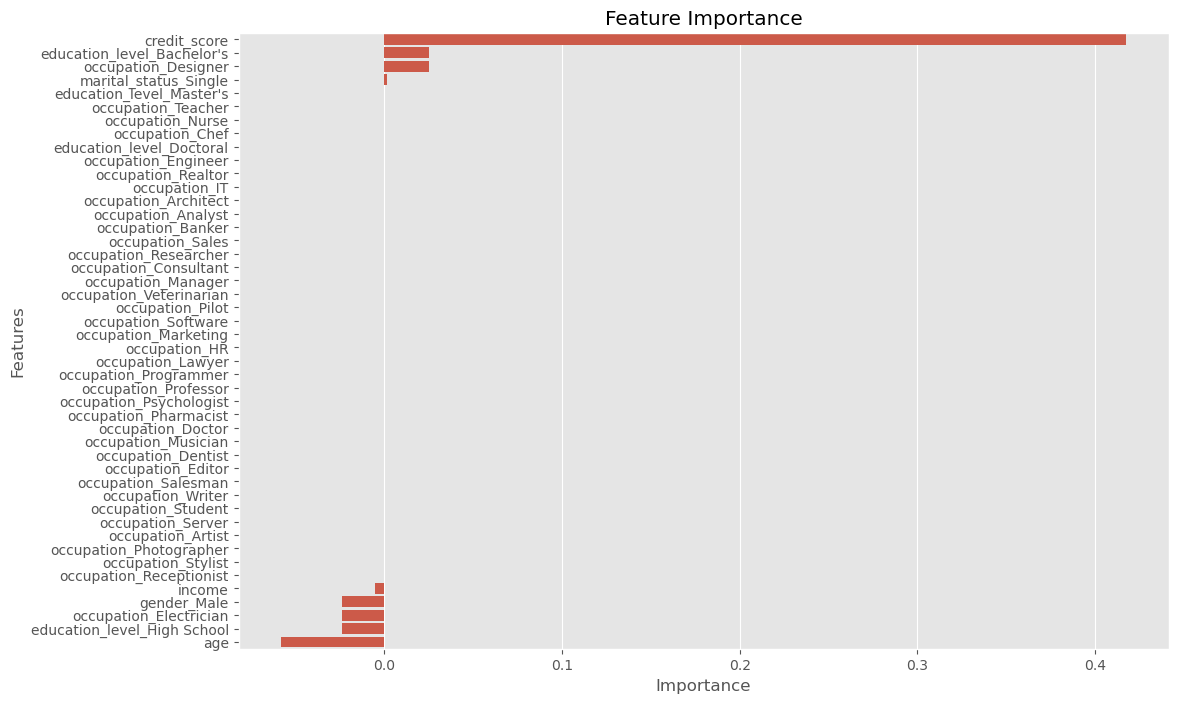

In [25]:
feature_importance = pd.DataFrame({'Features': X.columns, 'Importance': lr.coef_[0]})
feature_importance = feature_importance.sort_values(by='Importance', ascending= False)

plt.figure(figsize=(12,8))
sns.barplot(x='Importance', y = 'Features', data = feature_importance)
plt.title('Feature Importance')
plt.show()

`Credit score` it the most significant factor that influences loan approval for an individual